In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import utils as utils


In [300]:
def plot_counts_na(df, x, draw=True):
    df[x] = df[x].fillna('NA')

    print(df[x].value_counts(dropna=False))

    if draw:
        sns.countplot(data=df, x=x, order = df[x].value_counts().index)
        
        plt.xticks(rotation=30)
        plt.show()



# 1. Data Cleaning

In [30]:
df_vehicles = pd.read_csv('./data/vehicles.csv')


In [31]:
df_vehicles.shape


(426880, 26)

## Basic cleaning

In [54]:
def basic_clean(df):
    useless_columns = ['id', 'url', 'region_url', 'image_url', 'posting_date', 'VIN', 'county', 'size']

    cleaned_df = df.drop(columns=useless_columns, axis=0)

    # remove na, or we can find the year based on model, manufacture
    cleaned_df = cleaned_df.dropna(subset=['year'])

    # drop 'description', or we can use NLP technique to extract useful feature
    cleaned_df = cleaned_df.drop(columns=['description'], axis=0)
 
    
    print('remaining columns: ', df.columns[~df.columns.isin(useless_columns + ['description'])].values)

    return cleaned_df


In [55]:
df = basic_clean(df_vehicles)

df.shape


remaining columns:  ['region' 'price' 'year' 'manufacturer' 'model' 'condition' 'cylinders'
 'fuel' 'odometer' 'title_status' 'transmission' 'drive' 'type'
 'paint_color' 'state' 'lat' 'long']


(425675, 17)

## region

## state

## lat

## long

## manufacturer

In [85]:
df['manufacturer'].unique(), len(df['manufacturer'].unique())


(array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
        'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
        'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
        'subaru', 'NA', 'acura', 'hyundai', 'mercedes-benz', 'bmw',
        'mitsubishi', 'volkswagen', 'porsche', 'kia', 'rover', 'ferrari',
        'mini', 'pontiac', 'fiat', 'tesla', 'saturn', 'mercury',
        'harley-davidson', 'datsun', 'aston-martin', 'land rover',
        'morgan'], dtype=object),
 43)

In [260]:
country_manufacture_mapping = {
    'USA': [
        'chevrolet', 'jeep', # 1st-class
        'tesla', 'buick', 'ford', 'gmc', 'ram', # 2nd-class
        'lincoln','dodge','chrysler', 'cadillac', 'pontiac', 'mercury', 'saturn', 'harley-davidson'
           ],
    'Japan': [
            'toyota', 
            'acura', 'nissan','infiniti', 'lexus', 
            'honda', 'mitsubishi', 'datsun', 'subaru', 'mazda', 
    ],
    'Germany': [
        'mercedes-benz',
        'bmw', 'audi', 'porsche', 
        'volkswagen' 
    ],
    'UK': [
            'aston-martin', 
            'rover', 'jaguar',  
            'mini','land-rover', 'morgan'
    ],
    'Italy': [
        'ferrari', 
        'alfa-romeo',
        'fiat', 
    ],
    'Korea': ['hyundai', 'kia'],
    'Sweden': ['volvo'],
}

manufacturer
alfa-romeo     28237.348941
ferrari       107438.736842
fiat           11890.517677
Name: price, dtype: float64

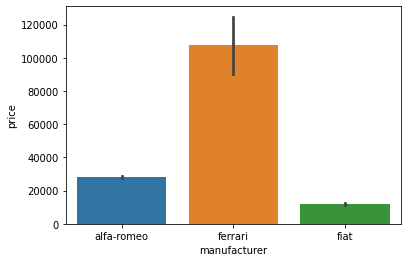

In [261]:
country_group = df[df['manufacturer'].isin(country_manufacture_mapping['Italy'])]

sns.barplot(data=country_group, x='manufacturer', y='price')

country_group.groupby(['manufacturer'])['price'].mean()


**Comments**

Following are manufactures whose prices are significantly higher than other manufacutures 

- USA: 'jeep', 'chevrolet'; 'tesla', 'buick', 'ford', 'gmc', 'ram',

- Japan: toyota; nissan, lexus, infiniti, acurami

- Germany: mercedes-benz; audi, bmw, posche

- UK: aston-martin; jaguar, rover

- Italy: ferrari; alfa-romeo


TODO: prestigae cars are much higher than common cars(Benz is much higher than bmw) when compared in the same country, so we can further indicate the class of the car in the same conuntry based on 'manu_country' .


In [298]:
def clean_manufacture(df):
    for country, manufactures in country_manufacture_mapping:
        df.loc[df['manufacturer'].isin(manufactures), 'manu_country'] = country

    df.loc[df['manufacturer'].isna(), 'manu_country'] = 'missing'

    return df


## model

In [129]:
df['model'].unique()[:5], len(df['model'].unique())


(array(['sierra 1500 crew cab slt', 'silverado 1500',
        'silverado 1500 crew', 'tundra double cab sr', 'f-150 xlt'],
       dtype=object),
 29485)

## condition


NA           172909
good         121456
excellent    101457
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64


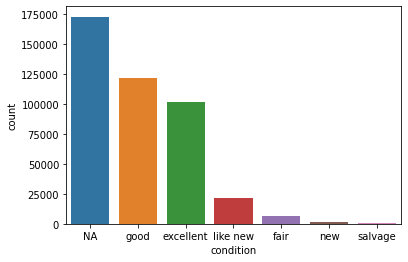

In [128]:
plot_counts_na(df, 'condition')


<AxesSubplot:xlabel='condition', ylabel='price'>

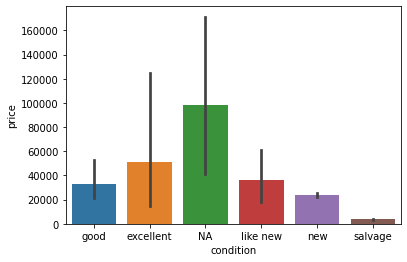

In [329]:
sns.barplot(data=df[
 ~df['condition'].isin(['fair'])
], x='condition', y='price')



<AxesSubplot:xlabel='condition', ylabel='odometer'>

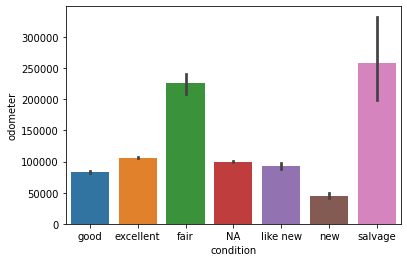

In [270]:
sns.barplot(data=df, x='condition', y='odometer')


**Comments**

- most cars are in good or excellent conditions

- Cars with higher odometer are in poor condition(fair, salvage)

- Cars in poor condition are worthless.

- People prefer cars in fair condition maybe because these cars have a relative higher odometers --- cars are used more often than that in good or new contions.

- Cars with missing condtions have similar ododemter compared to cars in excellent or new conditions, but the prices are much larger than them(TODO: Why? Some other factors may affect their prices)



In [330]:
def clean_condition(df):
    poor_condition = [ 'salvage' ]
    fair_condition = [ 'fair' ]
    good_condition = [ 'good', 'excellent', 'like new', 'new']
    
    df.loc[df['condition'].isin(poor_condition), 'condition_odometer'] = 'poor'
    df.loc[df['condition'].isin(fair_condition), 'condition_odometer'] = 'fair'
    df.loc[df['condition'].isin(good_condition), 'condition_odometer'] = 'good'
    df.loc[df['condition'].isna(), 'condition_odometer'] = 'missing'
    return df


## cylinders


NA              177591
6 cylinders      93700
4 cylinders      77293
8 cylinders      71776
5 cylinders       1712
10 cylinders      1448
other             1298
3 cylinders        648
12 cylinders       209
Name: cylinders, dtype: int64


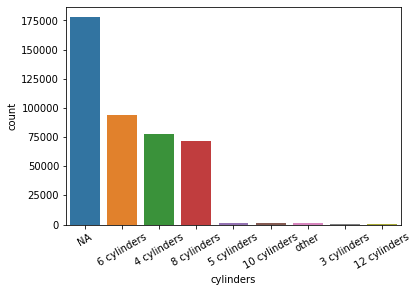

In [301]:
plot_counts_na(df, 'cylinders')


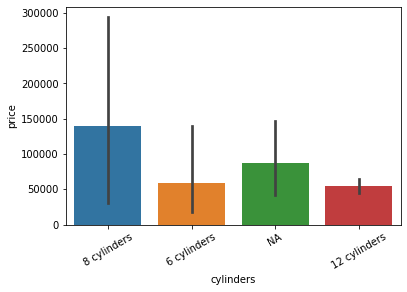

In [297]:

sns.barplot(
        data=df[
            df['cylinders'].isin([
                '8 cylinders', 
                '6 cylinders','12 cylinders', 
                'NA'
            ])
       ],
        x='cylinders', y='price'
)
plt.xticks(rotation=30)
plt.show()


**Comments**

- prices vary significantly in different cylinders

- 8 cylinders has the highest average prices followed by missing cylinders

- 6 and 12 have the same average prices

- 4, 5, 3, 10, other are similar


Maybe we can dig deeper what featuures are related to cylinders



In [299]:
def clean_cylinders(df):
    # each type will be enconded individually
    df.loc[df['cylinders'].isna(), 'cylinders'] = 'missing' # distinguish missing with the existed 'other'
    return df


## fuel

gas         355426
other        30717
diesel       29927
hybrid        5165
NA            2745
electric      1695
Name: fuel, dtype: int64


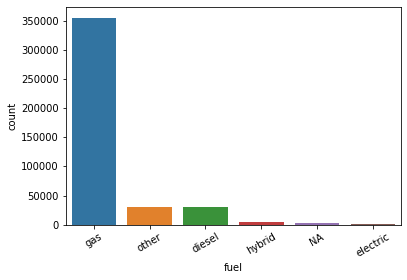

In [302]:
plot_counts_na(df, 'fuel')


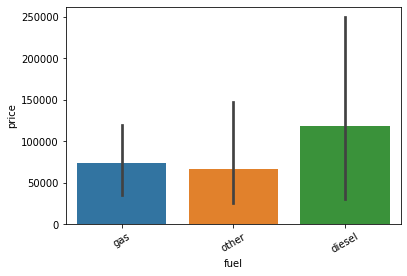

In [318]:

sns.barplot(
        data=df[
            df['fuel'].isin(['gas', 'other', 'diesel'])
        ],
        x='fuel', y='price'
)
plt.xticks(rotation=30)
plt.show()


**comments**

- diesel are expensive

- gas and other are similar

- electric could be individual type

- hybrid and NA are similar



In [315]:
def clean_fule():
    # ['diesel'] => 1st
    # ['gas', 'other'] => common
    # ['electric',]
    # [ 'hybrid', 'NA' ]
    # or ['electric', hybrid', 'NA' ] 
    
    df.loc[df['fuel'].isin([ 'diesel' ]), 'fuel_group'] = 'diesel'
    df.loc[df['fuel'].isin(['gas', 'other' ]), 'fuel_group'] = 'gas'
    df.loc[df['paint_color'].isna(), 'fuel_group'] = 'hybrid'
    
    return df
    

## title_status

clean         404334
NA              7930
rebuilt         7109
salvage         3868
lien            1422
missing          814
parts only       198
Name: title_status, dtype: int64


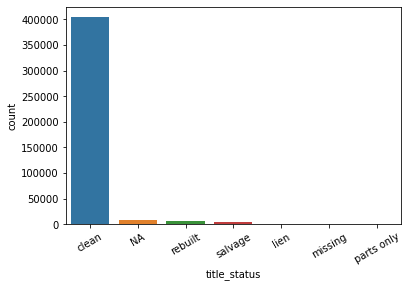

In [316]:
plot_counts_na(df, 'title_status')


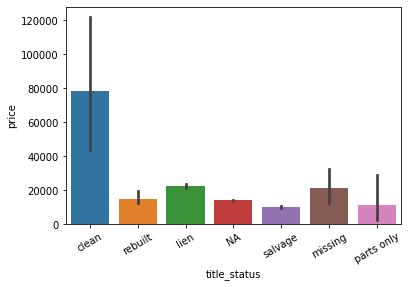

In [332]:

sns.barplot(
        data=df,
        x='title_status', y='price'
)
plt.xticks(rotation=30)
plt.show()


**comments**

- most cars were reported in a clean status

- cars in clean status have the highest average prices

- cars in salvage status have the lowest average prices



In [333]:
def clean_title_status(df):
    df.loc[~df['title_status'].isin([ 'clean' ]), 'tt_status_group'] = 'normal'
    df.loc[df['title_status'].isin([ 'clean' ]), 'tt_status_group'] = 'clean'
    return df


## paint_color

NA        130048
white      78923
black      62661
silver     42835
blue       31156
red        30362
grey       24261
green       7340
custom      6700
brown       6580
yellow      2140
orange      1982
purple       687
Name: paint_color, dtype: int64


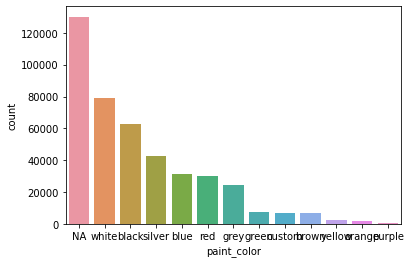

In [74]:
plot_counts_na(df, 'paint_color')


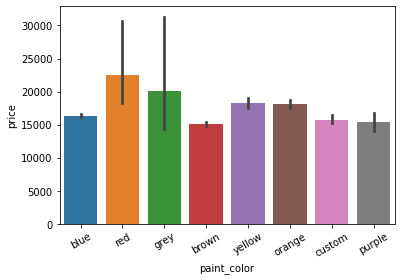

In [342]:

sns.barplot(
        data=df[
            ~df['paint_color'].isin(['green', 'silver', 'NA', 'white', 'black'])
        ],
        x='paint_color', y='price'
)
plt.xticks(rotation=30)
plt.show()


In [344]:
def clean_paint_color(df):
    # ['white', 'black', 'silver', na] => popular
    df.loc[df['paint_color'].isin(['white', 'black', 'silver' ]), 'paint_color_group'] = 'popular'
    df.loc[df['paint_color'].isna(), 'paint_color_group'] = 'popular'

    df.loc[df['paint_color'].isin([
        'blue', 'red', 'grey',
        'green', 'custom', 'brown', 
        'yellow', 'orange', 'purple',
    ]), 'paint_color_group'] = 'common'    
    
    return df


**Comments**

- green cars has the highest cars(but it could be rare, or bespoke one. TODO: )


- silver, white and black cars have much higher prices than cars in other colors


- Generally, color is not a decisive factor to buy a car.


So, maybe we could group 'silver, white, black, and NA' as a group, the remaining forms another group



## transmission

automatic    335433
other         62661
manual        25093
NA             2488
Name: transmission, dtype: int64


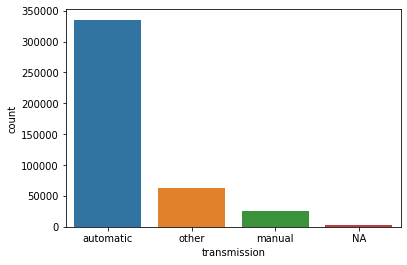

In [77]:
plot_counts_na(df, 'transmission')


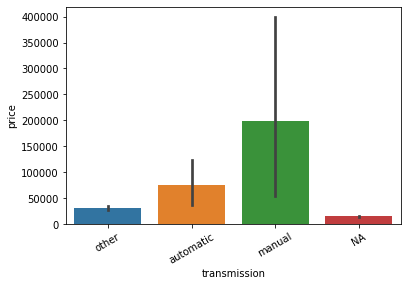

In [345]:

sns.barplot(
        data=df,
        x='transmission', y='price'
)
plt.xticks(rotation=30)
plt.show()


In [78]:
def clean_transmission(df):
    # impute missing values with 'other'
    df.loc[df['transmission'].isna(), 'transmission'] = 'other'
    return df


## drive

## type

## odometer

In [ ]:
    # trimming odometer
    max_first = cleaned_df['odometer'].max()
    cleaned_df = cleaned_df[cleaned_df['odometer'] != max_first]
    max_second = cleaned_df['odometer'].max()
    cleaned_df = cleaned_df[cleaned_df['odometer'] != max_second]

## price


## Ultimate cleaning


In [ ]:
def clean_data():
    pass


## 2. Create a Test Set


In [29]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)


In [30]:
train_set.shape, test_set.shape


((318009, 25), (79503, 25))

### Split X and y


In [58]:
vehicles_train = train_set.drop('price', axis=1)
y_train = train_set['price']

vehicles_test = test_set.drop('price', axis=1)
y_test = test_set['price']


In [59]:
vehicles_train.shape, y_train.shape, vehicles_test.shape, y_test.shape


((318009, 24), (318009,), (79503, 24), (79503,))

## 3. Pipeline

Useless columns
- 'id', 'url', 'region_url', 'image_url', 'post_date' are entirely irrelavant to the cars' price


Missing Values
- odometer', 'lat', 'long': imputed with mean values


Categorical Variables
- Onehot


Feature Enginering



In [66]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class selectColumnTransformer(BaseEstimator, TransformerMixin):
    """
    A transformer to select columns
    """
    def __init__(self, columns):
        self.columns = columns
    
    def transform(self, X):
        return X[self.columns]
    
    def fit(self, X, y=None):
        return self


class dropAllZeroColumnTransformer(BaseEstimator, TransformerMixin):
    """
    A transformer to drop all-zero columns
    """
    def transform(self, X):
        empty_columns = X.columns[X.isnull().all(axis=0)]
        return X.drop(empty_columns, axis=1)
        
    def fit(self, X, y=None):
        return self

    
class dropUselessColumnsTransformer(BaseEstimator, TransformerMixin):
    """
    A transformer to drop useless columns
    """
    def __init__(self, columns):
        self.columns = columns

    def transform(self, X):
        return X.drop(self.columns, axis=1)
        
    def fit(self, X, y=None):
        return self


class categoryAddFeatureTransformer(BaseEstimator, TransformerMixin):
    """
    generate more features from category variables
    """
    def transform(self, X):
        return X.fillna('unknown')

    def fit(self, X, y=None):
        return self
    

In [67]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler

outlier_attribs = ['odometer']
num_attribs = ['lat', 'long', 'year']
cat_attribs = [
    'manufacturer', 'condition', 'cylinders', 
    'fuel', 'title_status', 'transmission', 
    'drive', 'type', 'paint_color'  
]
useless_columns = [
    # irrelevant
    'id', 'url', 'region_url', 'image_url', 'posting_date', 'description',
    # too many missing values
    'VIN', 'size',
    # repeative or not much useful
    'region', 'state', 'model'
] 


outlier_pipeline = Pipeline([
    ('imputed', SimpleImputer(strategy='median')),
    ('outlier', RobustScaler())
])
num_pipeline = Pipeline([
    ('imputed', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])
cat_pipeline = Pipeline([  
    ('add_feature', categoryAddFeatureTransformer()),
    ('one_hot', OneHotEncoder())
])
# full pipeline
full_pipeline = make_pipeline(
#     dropAllZeroColumnTransformer(),
    dropUselessColumnsTransformer(useless_columns),
    ColumnTransformer([
        ('outlier', outlier_pipeline, outlier_attribs),
        ('num', num_pipeline, num_attribs),
        ('cat', cat_pipeline, cat_attribs)
    ])
)


In [68]:
X_train = full_pipeline.fit_transform(vehicles_train)

X_test = full_pipeline.transform(vehicles_test)

X_train.shape, X_test.shape


((318009, 111), (79503, 111))

In [69]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_train_pred = lin_reg.predict(X_train)

print('Training MSE:', mean_squared_error(y_train, y_train_pred))
print('Training RMSE:', mean_squared_error(y_train, y_train_pred, squared=False))
print('Training MAE:', mean_absolute_error(y_train, y_train_pred))
print('Training R2 score:', lin_reg.score(X_train, y_train))


Training MSE: 85336433.89000027
Training RMSE: 9237.77212806206
Training MAE: 6355.654058421237
Training R2 score: 0.45603847702085976


In [77]:
y_test_pred = lin_reg.predict(X_test)

print('Test MSE:', mean_squared_error(y_test, y_test_pred))
print('Test RMSE:', mean_squared_error(y_test, y_test_pred, squared=False))
print('Test MAE:', mean_absolute_error(y_test, y_test_pred))
print('Test R2 score:', lin_reg.score(X_test, y_test))


Test MSE: 86106794.84656583
Test RMSE: 9279.374701269791
Test MAE: 6371.54748712891
Test R2 score: 0.45157500552120156
